In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [7]:
df_dataset = pd.read_csv("/home/sunday/Coding/healthcare_chatbot/backend/disease_prediction/dataset/dataset.csv")
df_disease_description = pd.read_csv("/home/sunday/Coding/healthcare_chatbot/backend/disease_prediction/dataset/symptom_Description.csv")
df_disease_precaution = pd.read_csv("/home/sunday/Coding/healthcare_chatbot/backend/disease_prediction/dataset/symptom_precaution.csv")
df_symptom_severity  = pd.read_csv("/home/sunday/Coding/healthcare_chatbot/backend/disease_prediction/dataset/Symptom-severity.csv")

In [8]:
df = df_dataset
df1 = df_symptom_severity

In [9]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [11]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)

(4182, 17) (738, 17) (4182,) (738,)


In [16]:
x_test

array([[4, 3, 5, ..., 0, 0, 0],
       [1, 5, 4, ..., 0, 0, 0],
       [3, 4, 7, ..., 0, 0, 0],
       ...,
       [4, 4, 3, ..., 0, 0, 0],
       [5, 3, 4, ..., 0, 0, 0],
       [4, 5, 6, ..., 0, 0, 0]])

F1-score% = 94.22264689327375 | Accuracy% = 94.03794037940379


<AxesSubplot:>

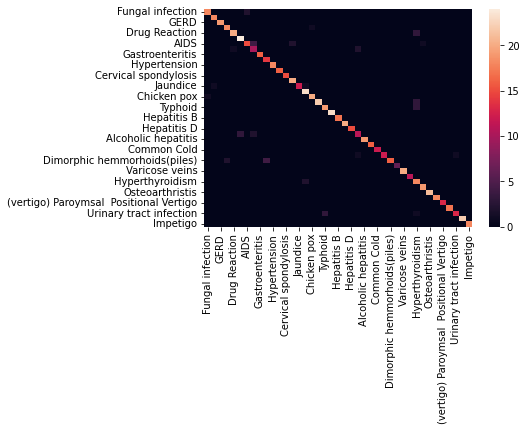

In [14]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [15]:
x_test

array([[3, 6, 7, ..., 0, 0, 0],
       [5, 3, 5, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [5, 4, 4, ..., 0, 0, 0],
       [3, 5, 4, ..., 0, 0, 0],
       [3, 5, 5, ..., 0, 0, 0]])

In [16]:
import pickle

In [18]:
filename = 'disease_prediction.sav'
pickle.dump(model, open(filename, 'wb'))